In [54]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

train = pd.read_csv('../../contest_baseline_code/data/EDA/241116_eda_train_labeled.csv')
test = pd.read_csv('../../contest_baseline_code/data/raw/test.csv')

train.head(1)

,id,paragraph,question,choices,answer,answer_len,필요 지식,세분류(모델),세분류(사람),보기 여부,데이터저품질-paragraph,데이터저품질-question,데이터저품질-choices,데이터저품질-answer,비고
0,generation-for-nlp-425,"상소하여 아뢰기를 , “신이 좌참 찬 송준길이 올린 차자를 보았는데 , 상복(喪服)...",상소한 인물이 속한 붕당에 대한 설명으로 옳은 것만을 모두 고르면?,"['ㄱ, ㄴ', 'ㄱ, ㄷ', 'ㄴ, ㄹ', 'ㄷ, ㄹ']",2,4,외부지식,정치와 법,한국사,True,띄어쓰기 오류,정상,정상,정상,NaN


In [55]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '/opt/conda/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 테스트용 코드
print(f"Loaded Font: {font_prop.get_name()}")

Loaded Font: NanumGothic


In [56]:
# 데이터 수 - train, test
''' AI Stages '''
print('train 데이터 수:', train.shape)
print('test 데이터 수:', test.shape)

train 데이터 수: (2031, 15)
test 데이터 수: (869, 4)


In [57]:
# train에서 kmmlu, mmmlu, mrc 데이터 수, 비율
'''
(from Confluence)
세분류 종류
1. KMMLU: 한국사 - 1개
2. MMMLU: 역사(세계), 역사(미국), 역사(유럽), 경제(미시), 경제(거시), 정치, 지리, 심리, (+통계) - 8개
3. KLUE-MRC: 경제, 교육산업, 국제, 부동산, 사회, 생활, 책마을 - 7개
'''
dataset_dict = {
    '한국사': 'KMMLU',
    '역사(세계)': 'MMMLU',
    '역사(미국)': 'MMMLU',
    '역사(유럽)': 'MMMLU',
    '경제(미시)': 'MMMLU',
    '경제(거시)': 'MMMLU',
    '정치': 'MMMLU',
    '지리': 'MMMLU',
    '심리': 'MMMLU',
    '통계': 'MMMLU',
    '경제': 'KLUE-MRC',
    '교육산업': 'KLUE-MRC',
    '국제': 'KLUE-MRC',
    '부동산': 'KLUE-MRC',
    '사회': 'KLUE-MRC',
    '생활': 'KLUE-MRC',
    '책마을': 'KLUE-MRC',
}

train['dataset'] = train['세분류(사람)'].map(dataset_dict)

In [58]:
train['dataset'].value_counts()

dataset
KLUE-MRC    1239
MMMLU        719
KMMLU         73
Name: count, dtype: int64

/tmp/ipykernel_3515290/2975742761.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


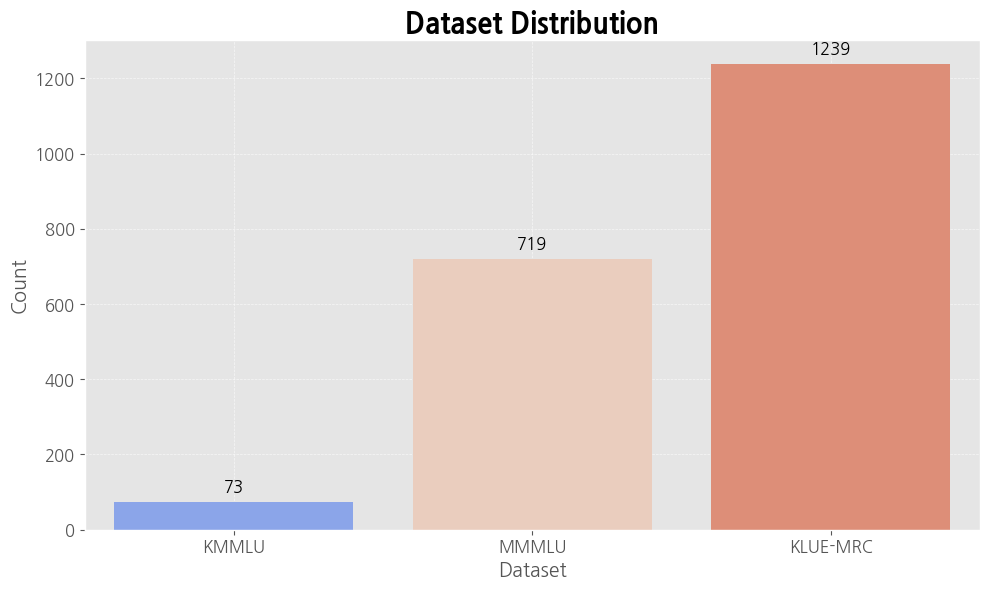

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# 공통 함수 정의: 막대 위 값 표시
def add_values_to_bars(ax, values):
    ymax = ax.get_ylim()[1]  # y축 최대값 가져오기
    for index, value in enumerate(values):
        ax.text(index, value + ymax * 0.02, str(value), ha='center', fontsize=12)  # y축의 2% 위에 값 표시

# 데이터셋 분포 계산
dataset_counts = train['dataset'].value_counts()
dataset_counts = dataset_counts.reindex(['KMMLU', 'MMMLU', 'KLUE-MRC'])

colors = sns.color_palette("coolwarm", 4)
custom_palette = {
    'KMMLU': colors[0],  # 첫 번째 색상
    'MMMLU': colors[2],  # 중간 색상
    'KLUE-MRC': colors[3]  # 마지막 색상
}

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x=dataset_counts.index,
    y=dataset_counts.values,
    palette=custom_palette
)

# 그래프 제목 및 축 라벨 설정
plt.title('Dataset Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Count', fontsize=14)

add_values_to_bars(plt.gca(), dataset_counts.values)

# 눈금 및 레이아웃 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


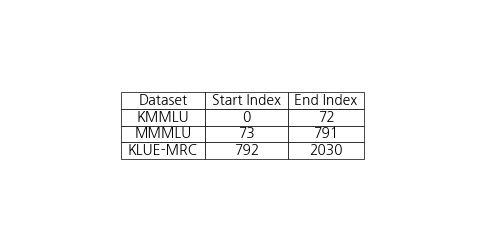

In [60]:
kmmlu = train[train['dataset'] == 'KMMLU']
mmmlu = train[train['dataset'] == 'MMMLU']
klue_mrc = train[train['dataset'] == 'KLUE-MRC']

# 테이블을 matplotlib으로 시각화
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')

# 데이터셋 인덱스 구간 테이블 데이터
table_data = [
    ["KMMLU", kmmlu.index[0], kmmlu.index[-1]],
    ["MMMLU", kmmlu.index[-1]+1, mmmlu.index[-1]],
    ["KLUE-MRC", mmmlu.index[-1]+1, klue_mrc.index[-1]]
]

# 테이블 생성 및 시각화
table = ax.table(cellText=table_data, colLabels=["Dataset", "Start Index", "End Index"], loc='center', cellLoc='center')

# 테이블 스타일 조정
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(table_data[0]))))

plt.show()


In [61]:
# 필요한 라이브러리 설치 및 재수행
from rapidfuzz import fuzz
from itertools import combinations
from tqdm import tqdm

# 1. Exact Match 확인
exact_duplicates = train[train.duplicated(subset=['paragraph'], keep=False)]

# 2. Similarity 확인 (RapidFuzz)
similarity_threshold = 90  # 유사도를 판단할 기준
similar_pairs = []

# Wrap combinations with tqdm
combinations_with_progress = tqdm(
    combinations(train['paragraph'].items(), 2), 
    desc="Calculating Similarities", 
    total=(len(train['paragraph']) * (len(train['paragraph']) - 1)) // 2
)

for (idx1, para1), (idx2, para2) in combinations_with_progress:
    similarity = fuzz.ratio(para1, para2)
    if similarity >= similarity_threshold:
        similar_pairs.append((idx1, idx2, similarity))

# 유사성 결과 데이터프레임 생성
paragraph_similarity_results = pd.DataFrame(similar_pairs, columns=['Index 1', 'Index 2', 'paragraph_similarity'])

# Exact Match 시각화
print("Exact Match Duplicates:")
print(exact_duplicates.shape)

# 유사성 결과 시각화
print("\nSimilarity Results:")
print(paragraph_similarity_results.shape)


Calculating Similarities: 100%|██████████| 2061465/2061465 [03:50<00:00, 8958.03it/s] 

Exact Match Duplicates:
(282, 16)

Similarity Results:
(375, 3)


In [62]:
paragraph_similarity_results

,Index 1,Index 2,paragraph_similarity
0,1,10,100.000000
1,20,67,100.000000
2,27,48,99.719888
3,31,47,100.000000
4,32,60,100.000000
...,...,...,...
370,758,767,100.000000
371,760,777,100.000000
372,776,787,99.858557
373,779,781,100.000000


In [63]:
# # 1. Exact Match 확인
# exact_duplicates_question = train[train.duplicated(subset=['question'], keep=False)]

# # 2. Similarity 확인 (RapidFuzz)
# similarity_threshold = 90  # 유사도를 판단할 기준
# similar_pairs_question = []

# # Wrap combinations with tqdm
# combinations_with_progress_question = tqdm(
#     combinations(train['question'].items(), 2), 
#     desc="Calculating Similarities for Questions", 
#     total=(len(train['question']) * (len(train['question']) - 1)) // 2
# )

# for (idx1, ques1), (idx2, ques2) in combinations_with_progress_question:
#     similarity = fuzz.ratio(ques1, ques2)
#     if similarity >= similarity_threshold:
#         similar_pairs_question.append((idx1, idx2, similarity))

# # 유사성 결과 데이터프레임 생성
# similarity_results_question = pd.DataFrame(similar_pairs_question, columns=['Index 1', 'Index 2', 'Similarity'])

# # Exact Match 시각화
# print("Exact Match Duplicates (Questions):")
# print(exact_duplicates_question.shape)

# # 유사성 결과 시각화
# print("\nSimilarity Results (Questions):")
# print(similarity_results_question.shape)


In [64]:
from rapidfuzz import fuzz

# 유사한 paragraph에 해당하는 question 유사도 및 동일 여부 확인
paragraph_question_similarity_check = []
for _, row in paragraph_similarity_results.iterrows():
    idx1, idx2 = row['Index 1'], row['Index 2']
    question1 = train.loc[idx1, 'question']
    question2 = train.loc[idx2, 'question']
    
    # question의 유사도 계산
    similarity = fuzz.ratio(question1, question2)

    if similarity >= 90:
        paragraph_question_similarity_check.append({
            'Index 1': int(row['Index 1']),
            'Index 2': int(row['Index 2']),
            'Paragraph 1': train.loc[idx1, 'paragraph'],
            'Paragraph 2': train.loc[idx2, 'paragraph'],
            'paragraph_similarity': row['paragraph_similarity'],
            'Question 1': question1,
            'Question 2': question2,
            'question_similarity': similarity,
        })

# 결과를 데이터프레임으로 정리
paragraph_question_similarity_results = pd.DataFrame(paragraph_question_similarity_check)

# 결과 출력
print("Paragraph-Question Similarity Results:")
print(paragraph_question_similarity_results.shape)

Paragraph-Question Similarity Results:
(9, 8)


In [65]:
paragraph_question_similarity_results

,Index 1,Index 2,Paragraph 1,Paragraph 2,paragraph_similarity,Question 1,Question 2,question_similarity
0,1,10,"(가)은/는 의병계열과 애국계몽 운동 계열의 비밀결사가 모여 결성된 조직으로, 총사...","(가)은/는 의병계열과 애국계몽 운동 계열의 비밀결사가 모여 결성된 조직으로, 총사...",100.000000,(가)에 대한 설명으로 옳지 않은 것은?,(가)에 대한 설명으로 옳지 않은 것은?,100.0
1,20,67,"이제 살펴보건대, 신라가 주․군을 설치할 때 그 전정(田丁), 호구(戶口)가 현의 ...","이제 살펴보건대, 신라가 주․군을 설치할 때 그 전정(田丁), 호구(戶口)가 현의 ...",100.000000,"㉠, ㉡의 거주민에 대한 설명으로 옳은 것은?","㉠, ㉡의 거주민에 대한 설명으로 옳은 것은?",100.0
2,27,48,탑골공원에 모인 수많은 학생과 시민이 독립선언식을 거행하고 만세를 부르며 거리를 행...,탑골공원에 모인 수많은 학생과 시민이 독립선언식을 거행하고 만세를 부르며 거리를 행...,99.719888,(가) 단체의 활동에 대한 설명으로 옳은 것은?,(가) 단체의 활동에 대한 설명으로 옳은 것은?,100.0
3,31,47,(가)신라의 우산국 복속 (나)고구려의 서 안평 점령(다) 백제의 대야성 점령 (라...,(가)신라의 우산국 복속 (나)고구려의 서 안평 점령(다) 백제의 대야성 점령 (라...,100.000000,다음 사건을 시기 순으로 바르게 나열한 것은?,다음 사건을 시기 순으로 바르게 나열한 것은?,100.0
4,32,60,(가)농민군이 정부와 전주화약을 맺었다. (나) 농민군이 우금치에서 전투를 벌였다....,(가)농민군이 정부와 전주화약을 맺었다. (나) 농민군이 우금치에서 전투를 벌였다....,100.000000,이를 시기 순으로 바르게 나열한 것은?,이를 시기 순으로 바르게 나열한 것은?,100.0
5,141,179,"""버킹엄 궁전, 1839년 5월 10일. 여왕은 지난 나흘 동안 자신이 해야 한 많...","버킹엄 궁전, 1839년 5월 10일. 여왕은 지난 나흘 동안 자신이 해야 한 많은...",94.025974,이 지문에 나타난 정보는 무엇입니까?,이 지문에 나타난 정보는 무엇입니까?,100.0
6,323,384,시나리오: 후반기 자신의 고전적 조건화 실험에서 파블로프(Ivan Pavlov)의 ...,시나리오: 후반기 자신의 고전적 조건화 실험에서 파블로프(Ivan Pavlov)의 ...,100.000000,다음 시나리오를 가장 잘 설명하는 ‘고전적 조건화’(classical conditi...,다음 시나리오를 가장 잘 설명하는 ‘고전적 조건화’(classical conditi...,100.0
7,524,583,"""국가적 문제가 엄중한 시기, 국가의 정의 의식으로 탄생한 국민의 양심으로 새로운 ...","""국가적 문제가 엄중한 시기, 국가의 정의 의식으로 탄생한 국민의 양심으로 새로운 ...",92.756350,이 지문에 나타난 정보는 무엇입니까?,이 지문에 나타난 정보는 무엇입니까?,100.0
8,679,682,"포르투갈인들이 중국의 마카오에서 일본으로 갈 때, 흰 비단과 금, 사향, 도자기 등...","""포르투갈인들이 중국의 마카오에서 일본으로 갈 때, 흰 비단과 금, 사향, 도자기 ...",96.216216,서기 1750-1900에 일어난 다음 사건 중 첫 번째 글에서 언급한 무역 패턴을 ...,서기 1450-1750에 일어난 다음 사건 중 첫 번째 글에서 언급한 무역 패턴을 ...,95.0


In [66]:
print(paragraph_question_similarity_results.at[8, 'Paragraph 1'])
print(paragraph_question_similarity_results.at[8, 'Paragraph 2'])

포르투갈인들이 중국의 마카오에서 일본으로 갈 때, 흰 비단과 금, 사향, 도자기 등을 많이 가져가지만, 일본에서는 은만 가져간다. 이들은 매년 일본으로 가는 거대한 무장 상선이 있는데, 이 상선은 매년 일본에서 약 600개의 은화를 가져온다. 그리고 일본에서 가져온 은화와 매년 인도에서 가져오는 20만 개의 은화를 중국에 팔아 이익을 남긴다. 그리고 중국에서 다시 금, 사향, 실크, 구리, 도자기와 매우 값비싸고 화려한 많은 다른 물건들을 가져온다. 포르투갈인들이 경유지로 중국 관동에 왔을 때 그 곳에서 며칠 간 머물러야 했다. 이들이 도시 관문으로 나왔을 때 자신들의 이름을 기록해야 했고 밤에 나갈 때에도 이름을 기록해야 했다. 밤새도록 마을에 머무를 수는 없었고, 밖에 있는 자신들의 배에서 밤을 보내야 했다. 주어진 시간이 경과했을 때 도시에 남아있는 자가 있다면 감옥에 수감되었다.
"포르투갈인들이 중국의 마카오에서 일본으로 갈 때, 흰 비단과 금, 사향, 도자기 등을 많이 가져가지만, 일본에서는 은만 가져간다. 이들은 매년 일본으로 가는 거대한 무장 상선이 있는데, 이 상선은 매년 일본에서 약 600개의 은화를 가져온다. 그리고 일본에서 가져온 은화와 매년 인도에서 가져오는 20만 개의 은화를 중국에 팔아 이익을 남긴다. 그리고 중국에서 다시 금, 사향, 실크, 구리, 도자기와 매우 값비싸고 화려한 많은 다른 물건들을 가져온다. 포르투갈인들이 경유지로 중국 관동에 왔을 때 그 곳에서 며칠 간 머물러야 했다. 이들이 도시 관문으로 나왔을 때 자신들의 이름을 기록해야 했고 밤에 나갈 때에도 이름을 기록해야 했다. 밤새도록 마을에 머무를 수는 없었고, 밖에 있는 자신들의 배에서 밤을 보내야 했다. 주어진 시간이 경과했을 때 도시에 남아있는 자가 있다면 감옥에 수감되었다.” Ralph Fitch, 극동으로의 여행기, 1599 C.E


In [67]:
from rapidfuzz import fuzz

# 유사한 paragraph에 해당하는 question 유사도 및 동일 여부 확인
paragraph_question_choices_similarity_check = []
for _, row in paragraph_question_similarity_results.iterrows():
    idx1, idx2 = row['Index 1'], row['Index 2']
    choices1 = train.loc[idx1, 'choices']
    choices2 = train.loc[idx2, 'choices']
    
    # question의 유사도 계산
    similarity = fuzz.ratio(choices1, choices2)

    if similarity >= 90:
        paragraph_question_choices_similarity_check.append({
            'Index 1': int(row['Index 1']),
            'Index 2': int(row['Index 2']),
            'Paragraph 1': train.loc[idx1, 'paragraph'],
            'Paragraph 2': train.loc[idx2, 'paragraph'],
            'paragraph_similarity': row['paragraph_similarity'],
            'Question 1': row['Question 1'],
            'Question 2': row['Question 2'],
            'question_similarity': similarity,
            'Choices 1': choices1,
            'Choices 2': choices2,
        })

# 결과를 데이터프레임으로 정리
paragraph_question_choices_similarity_results = pd.DataFrame(paragraph_question_choices_similarity_check)

# 결과 출력
print("Paragraph-Question Similarity Results:")
print(paragraph_question_choices_similarity_results.shape)

Paragraph-Question Similarity Results:
(1, 10)


In [68]:
paragraph_question_choices_similarity_results

,Index 1,Index 2,Paragraph 1,Paragraph 2,paragraph_similarity,Question 1,Question 2,question_similarity,Choices 1,Choices 2
0,323,384,시나리오: 후반기 자신의 고전적 조건화 실험에서 파블로프(Ivan Pavlov)의 ...,시나리오: 후반기 자신의 고전적 조건화 실험에서 파블로프(Ivan Pavlov)의 ...,100.0,다음 시나리오를 가장 잘 설명하는 ‘고전적 조건화’(classical conditi...,다음 시나리오를 가장 잘 설명하는 ‘고전적 조건화’(classical conditi...,96.875,"['변별', '자발적 회복', '흔적조건화', '일반화']","['차별', '자발적 회복', '흔적조건화', '일반화']"


In [69]:
idx1 = paragraph_question_choices_similarity_results['Index 1'].values[0]
idx2 = paragraph_question_choices_similarity_results['Index 2'].values[0]
train.at[idx1, 'answer'], train.at[idx2, 'answer']

(4, 4)

In [70]:
# 결측치 확인: empty string, None, NaN, space

# 모든 데이터의 타입을 열별로 확인
print("\nDetailed Type Checking:")
type_check = train.applymap(type)

# 열별 데이터 타입의 분포 확인 (type을 문자열로 변환 후 처리)
type_summary = type_check.applymap(lambda x: str(x)).apply(lambda col: col.value_counts())

print("\nType Distribution Summary:")
print(type_summary)



Detailed Type Checking:

Type Distribution Summary:
                     id  paragraph  question  choices  answer  answer_len  \
<class 'bool'>      NaN        NaN       NaN      NaN     NaN         NaN   
<class 'float'>     NaN        NaN       NaN      NaN     NaN         NaN   
<class 'int'>       NaN        NaN       NaN      NaN  2031.0      2031.0   
<class 'str'>    2031.0     2031.0    2031.0   2031.0     NaN         NaN   

                  필요 지식  세분류(모델)  세분류(사람)   보기 여부  데이터저품질-paragraph  \
<class 'bool'>      NaN      NaN      NaN  2031.0               NaN   
<class 'float'>     NaN      3.0      NaN     NaN               NaN   
<class 'int'>       NaN      NaN      NaN     NaN               NaN   
<class 'str'>    2031.0   2028.0   2031.0     NaN            2031.0   

                 데이터저품질-question  데이터저품질-choices  데이터저품질-answer      비고  \
<class 'bool'>               NaN             NaN            NaN     NaN   
<class 'float'>              NaN             NaN       

/tmp/ipykernel_3515290/1057604122.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  type_check = train.applymap(type)
/tmp/ipykernel_3515290/1057604122.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  type_summary = type_check.applymap(lambda x: str(x)).apply(lambda col: col.value_counts())


In [71]:
# 결측치 확인: empty string, None, NaN, space

train_null_check = train.replace({"": None, " ": None})
train_null_check = train_null_check.applymap(lambda x: None if isinstance(x, str) and x.strip() == "" else x)

train_null_check.isnull().sum()

/tmp/ipykernel_3515290/802159129.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_null_check = train_null_check.applymap(lambda x: None if isinstance(x, str) and x.strip() == "" else x)


id                     0
paragraph              0
question               0
choices                0
answer                 0
answer_len             0
필요 지식                  0
세분류(모델)                3
세분류(사람)                0
보기 여부                  0
데이터저품질-paragraph       0
데이터저품질-question        0
데이터저품질-choices         0
데이터저품질-answer          0
비고                  2024
dataset                0
dtype: int64

In [72]:
data = "['ㄱ, ㄴ', 'ㄱ, ㄷ', 'ㄴ, ㄹ', 'ㄷ, ㄹ']"

# 문자열을 리스트로 변환
converted_list = literal_eval(data)
converted_list

['ㄱ, ㄴ', 'ㄱ, ㄷ', 'ㄴ, ㄹ', 'ㄷ, ㄹ']

In [73]:
type(train.at[0, 'choices'])

str

In [74]:
def calculate_choices_length(row):
    cnt = 0
    for choice in row:
        cnt += len(choice)
    return cnt

train['choices'] = train['choices'].apply(lambda x: literal_eval(x))
train['paragraph_length'] = train['paragraph'].apply(len)
train['question_length'] = train['question'].apply(len)
train['choices_length'] = train['choices'].apply(calculate_choices_length)
train['total_length'] = train['paragraph_length'] + train['question_length'] + train['choices_length']
train.head(2)

,id,paragraph,question,choices,answer,answer_len,필요 지식,세분류(모델),세분류(사람),보기 여부,데이터저품질-paragraph,데이터저품질-question,데이터저품질-choices,데이터저품질-answer,비고,dataset,paragraph_length,question_length,choices_length,total_length
0,generation-for-nlp-425,"상소하여 아뢰기를 , “신이 좌참 찬 송준길이 올린 차자를 보았는데 , 상복(喪服)...",상소한 인물이 속한 붕당에 대한 설명으로 옳은 것만을 모두 고르면?,"[ㄱ, ㄴ, ㄱ, ㄷ, ㄴ, ㄹ, ㄷ, ㄹ]",2,4,외부지식,정치와 법,한국사,True,띄어쓰기 오류,정상,정상,정상,NaN,KMMLU,353,37,16,406
1,generation-for-nlp-426,"(가)은/는 의병계열과 애국계몽 운동 계열의 비밀결사가 모여 결성된 조직으로, 총사...",(가)에 대한 설명으로 옳지 않은 것은?,"[고려 문종 때에 남경(南京)으로 승격되었다., 종루(鐘樓), 이현, 칠패 등에서 ...",1,4,외부지식,비문학,한국사,False,정상,정상,정상,문제와 선지가 엇갈림,NaN,KMMLU,75,22,116,213


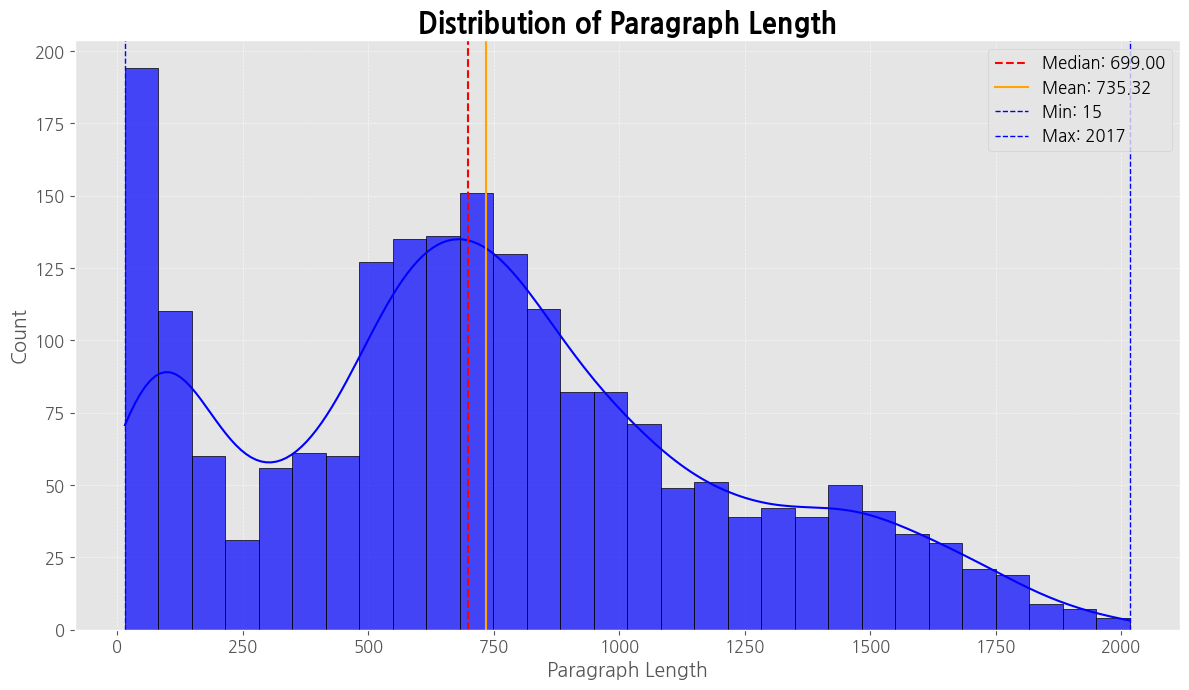

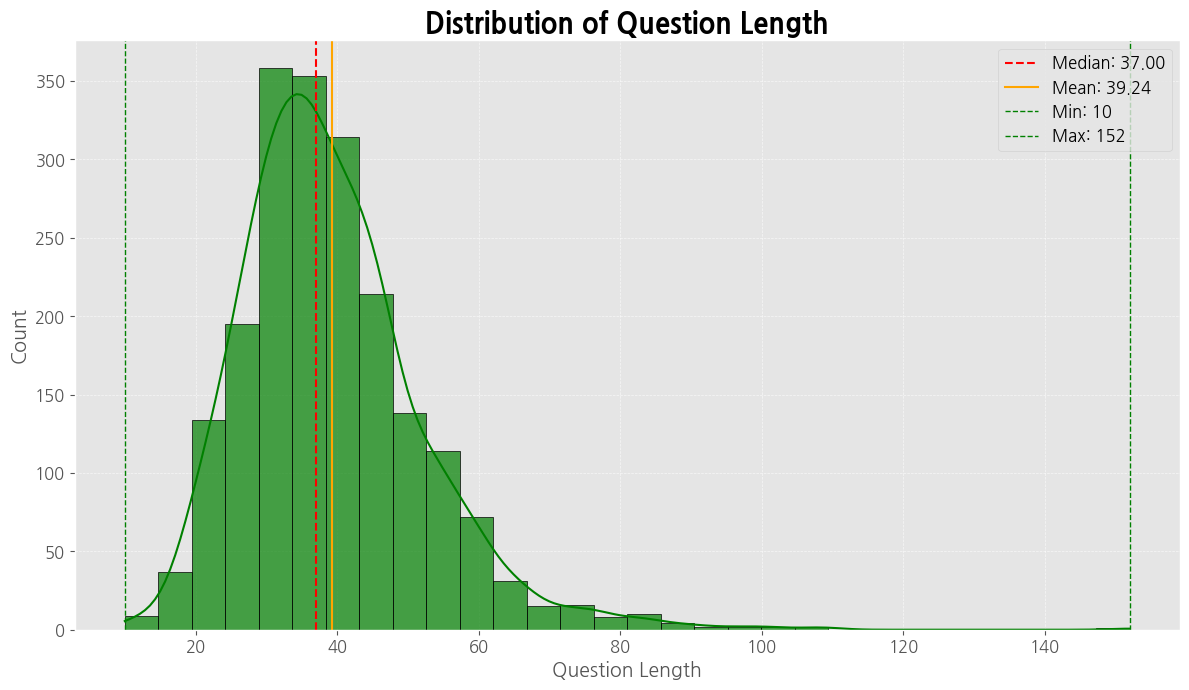

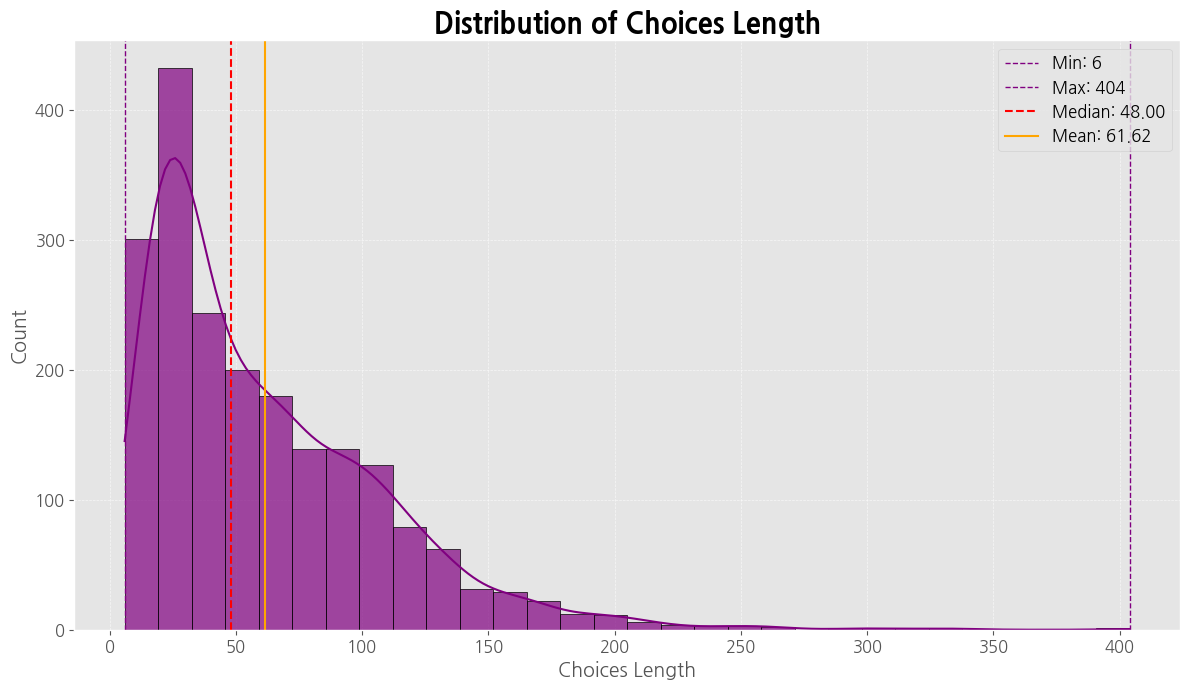

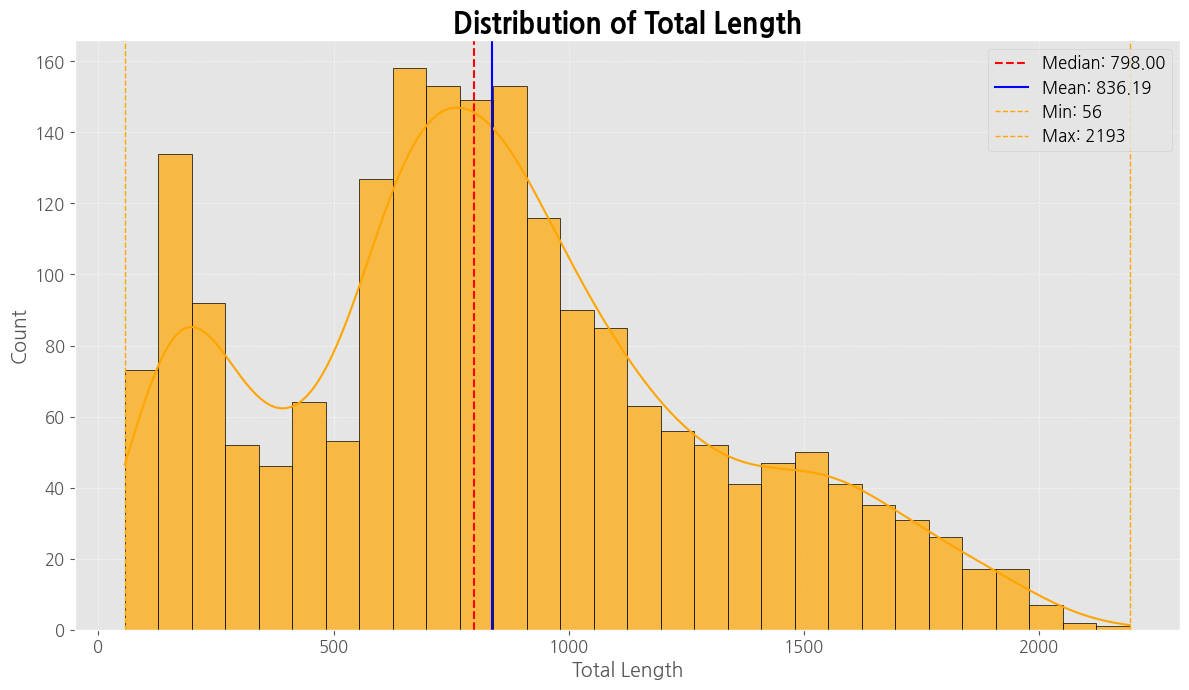

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
plt.style.use('ggplot')

# paragraph_length 시각화
plt.figure(figsize=(12, 7))
sns.histplot(
    train['paragraph_length'],
    bins=30,
    kde=True,
    color='blue',
    edgecolor='black',
    alpha=0.7
)

# 중앙값과 평균 계산
paragraph_median = train['paragraph_length'].median()
paragraph_mean = train['paragraph_length'].mean()

# 중앙값과 평균 표시
plt.axvline(paragraph_median, color='red', linestyle='--', linewidth=1.5, label=f'Median: {paragraph_median:.2f}')
plt.axvline(paragraph_mean, color='orange', linestyle='-', linewidth=1.5, label=f'Mean: {paragraph_mean:.2f}')

# 최솟값과 최댓값 계산
min_value = train['paragraph_length'].min()
max_value = train['paragraph_length'].max()

# 그래프에 표시
plt.axvline(min_value, color='blue', linestyle='--', linewidth=1, label=f'Min: {min_value}')
plt.axvline(max_value, color='blue', linestyle='--', linewidth=1, label=f'Max: {max_value}')

# 그래프 제목 및 축 라벨 설정
plt.title('Distribution of Paragraph Length', fontsize=20, fontweight='bold')
plt.xlabel('Paragraph Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12, loc='upper right')  # 범례 위치 오른쪽 위
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# question_length 시각화
plt.figure(figsize=(12, 7))
sns.histplot(
    train['question_length'],
    bins=30,
    kde=True,
    color='green',
    edgecolor='black',
    alpha=0.7
)

# 중앙값과 평균 계산
question_median = train['question_length'].median()
question_mean = train['question_length'].mean()

# 중앙값과 평균 표시
plt.axvline(question_median, color='red', linestyle='--', linewidth=1.5, label=f'Median: {question_median:.2f}')
plt.axvline(question_mean, color='orange', linestyle='-', linewidth=1.5, label=f'Mean: {question_mean:.2f}')

# 최솟값과 최댓값 계산
min_value = train['question_length'].min()
max_value = train['question_length'].max()

# 그래프에 표시
plt.axvline(min_value, color='green', linestyle='--', linewidth=1, label=f'Min: {min_value}')
plt.axvline(max_value, color='green', linestyle='--', linewidth=1, label=f'Max: {max_value}')

# 그래프 제목 및 축 라벨 설정
plt.title('Distribution of Question Length', fontsize=20, fontweight='bold')
plt.xlabel('Question Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12, loc='upper right')  # 범례 위치 오른쪽 위
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# choices_length 시각화
plt.figure(figsize=(12, 7))
sns.histplot(
    train['choices_length'],
    bins=30,
    kde=True,
    color='purple',
    edgecolor='black',
    alpha=0.7
)

# 중앙값과 평균 계산
choices_median = train['choices_length'].median()
choices_mean = train['choices_length'].mean()

# 최솟값과 최댓값 계산
min_value = train['choices_length'].min()
max_value = train['choices_length'].max()

# 그래프에 표시
plt.axvline(min_value, color='purple', linestyle='--', linewidth=1, label=f'Min: {min_value}')
plt.axvline(max_value, color='purple', linestyle='--', linewidth=1, label=f'Max: {max_value}')

# 중앙값과 평균 표시
plt.axvline(choices_median, color='red', linestyle='--', linewidth=1.5, label=f'Median: {choices_median:.2f}')
plt.axvline(choices_mean, color='orange', linestyle='-', linewidth=1.5, label=f'Mean: {choices_mean:.2f}')

# 그래프 제목 및 축 라벨 설정
plt.title('Distribution of Choices Length', fontsize=20, fontweight='bold')
plt.xlabel('Choices Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12, loc='upper right')  # 범례 위치 오른쪽 위
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# total_length 시각화
plt.figure(figsize=(12, 7))
sns.histplot(
    train['total_length'],
    bins=30,
    kde=True,
    color='orange',
    edgecolor='black',
    alpha=0.7
)

# 중앙값과 평균 계산
total_median = train['total_length'].median()
total_mean = train['total_length'].mean()

# 중앙값과 평균 표시
plt.axvline(total_median, color='red', linestyle='--', linewidth=1.5, label=f'Median: {total_median:.2f}')
plt.axvline(total_mean, color='blue', linestyle='-', linewidth=1.5, label=f'Mean: {total_mean:.2f}')

# 최솟값과 최댓값 계산
min_value = train['total_length'].min()
max_value = train['total_length'].max()

# 그래프에 표시
plt.axvline(min_value, color='orange', linestyle='--', linewidth=1, label=f'Min: {min_value}')
plt.axvline(max_value, color='orange', linestyle='--', linewidth=1, label=f'Max: {max_value}')

# 그래프 제목 및 축 라벨 설정
plt.title('Distribution of Total Length', fontsize=20, fontweight='bold')
plt.xlabel('Total Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12, loc='upper right')  # 범례 위치 오른쪽 위
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


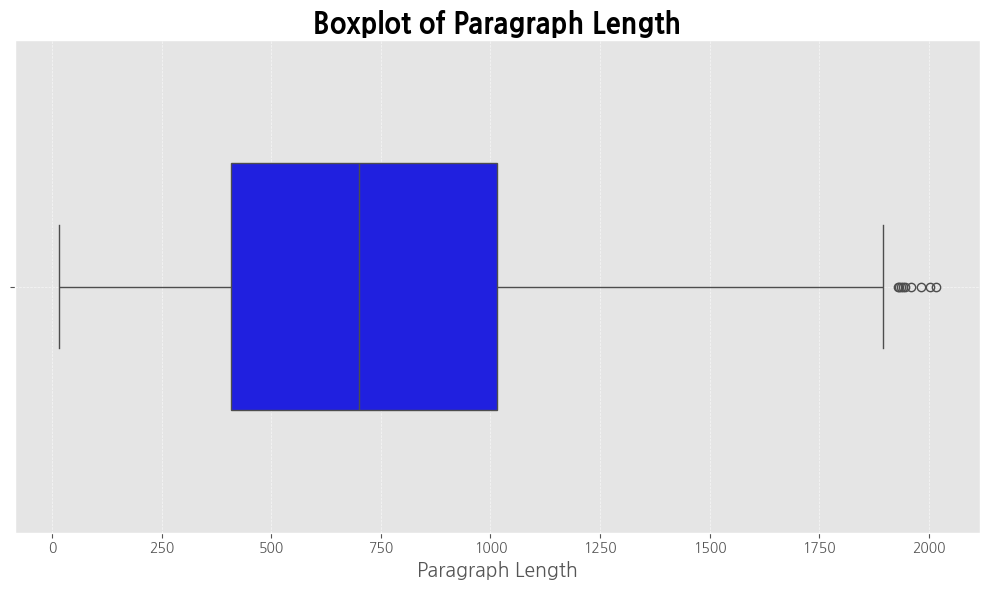

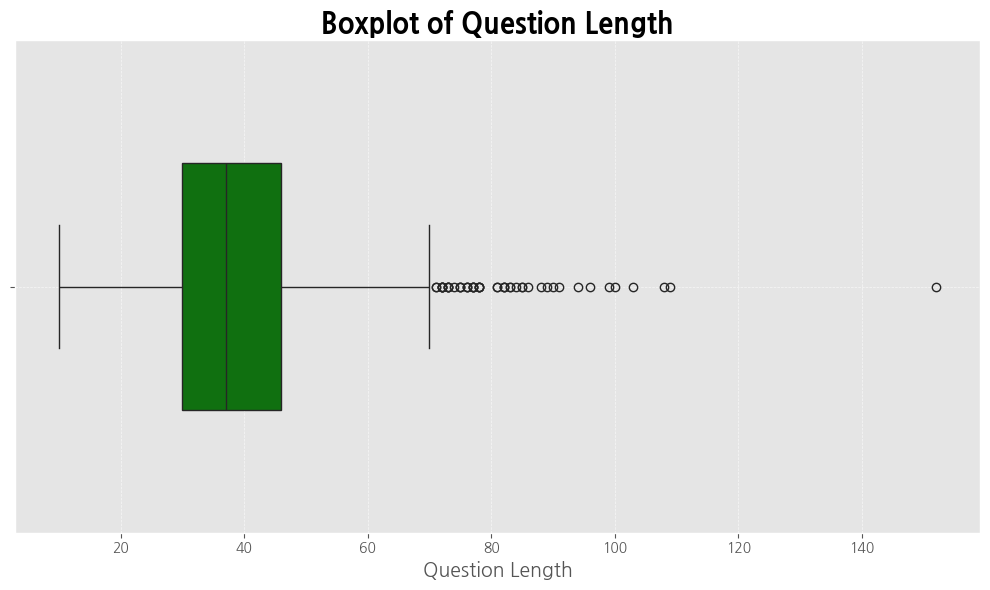

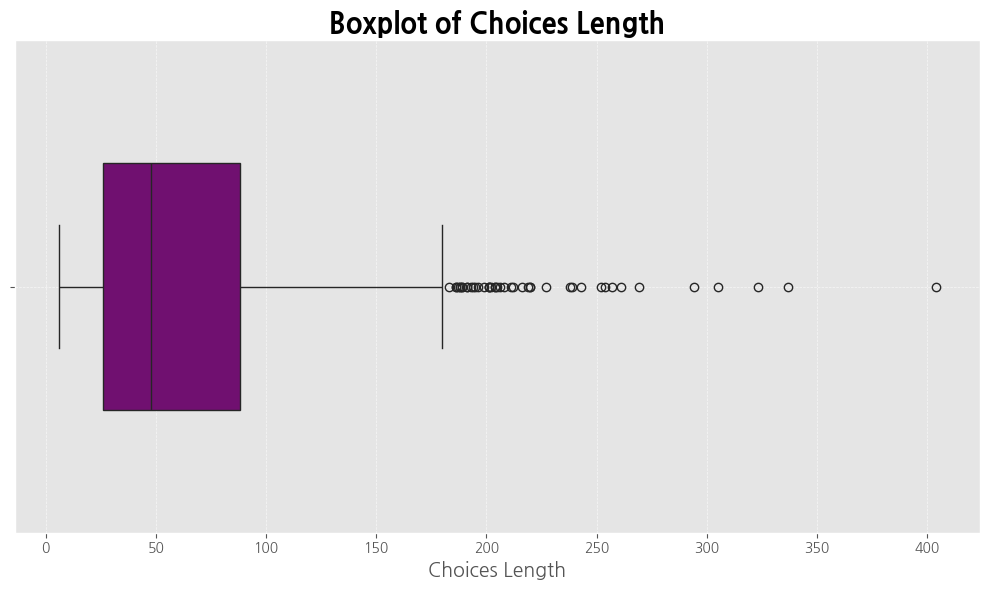

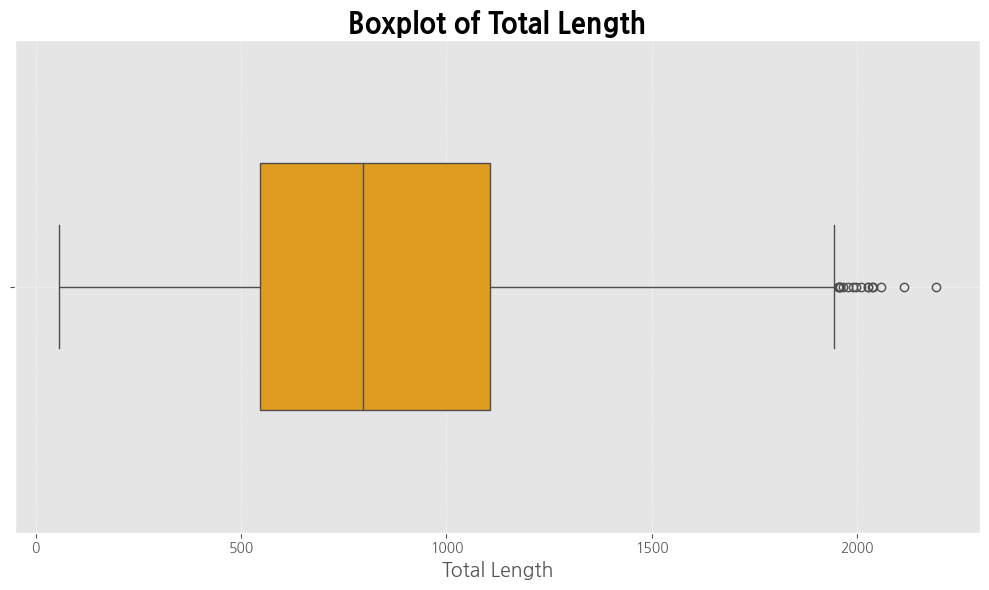

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 시각화: paragraph_length
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=train['paragraph_length'],
    color='blue',
    width=0.5
)
# 그래프 제목 및 축 라벨 설정
plt.title('Boxplot of Paragraph Length', fontsize=20, fontweight='bold')
plt.xlabel('Paragraph Length', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# 박스플롯 시각화: question_length
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=train['question_length'],
    color='green',
    width=0.5
)
# 그래프 제목 및 축 라벨 설정
plt.title('Boxplot of Question Length', fontsize=20, fontweight='bold')
plt.xlabel('Question Length', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# 박스플롯 시각화: choices_length
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=train['choices_length'],
    color='purple',
    width=0.5
)
# 그래프 제목 및 축 라벨 설정
plt.title('Boxplot of Choices Length', fontsize=20, fontweight='bold')
plt.xlabel('Choices Length', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# 박스플롯 시각화: total_length
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=train['total_length'],
    color='orange',
    width=0.5
)
# 그래프 제목 및 축 라벨 설정
plt.title('Boxplot of Total Length', fontsize=20, fontweight='bold')
plt.xlabel('Total Length', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



In [77]:
# paragraph가 가장 짧은 데이터 확인
min_paragraph_length = train['paragraph_length'].min()
min_paragraph_length_idx = train['paragraph_length'].idxmin()
print(train.loc[min_paragraph_length_idx, 'paragraph'])

# question 가장 짧은 데이터 확인
min_question_length = train['question_length'].min()
min_question_length_idx = train['question_length'].idxmin()
print(train.loc[min_question_length_idx, 'question'])

# choices 가장 짧은 데이터 확인
min_choices_length = train['choices_length'].min()
min_choices_length_idx = train['choices_length'].idxmin()
print(train.loc[min_choices_length_idx, 'choices'])


재정 정책     통화 정책
청바지 시장에서는?
['9', '8', '7.5', '7']


In [78]:
# paragraph가 짧은 데이터 확인: n% percentile
percentile_value = train['paragraph_length'].quantile(0.05)
short_paragraphs = train[train['paragraph_length'] < percentile_value]
# 긴 순서대로 정렬
short_paragraphs = short_paragraphs.sort_values(by='paragraph_length', ascending=True)

# 필터링된 데이터 확인
print(short_paragraphs.shape)
short_paragraphs[['paragraph', 'paragraph_length']].head(20)

(102, 20)


,paragraph,paragraph_length
676,인구조사 자료와 소련 교육부,15
217,재정 정책 통화 정책,15
225,재정 정책 통화 정책,15
238,달러 가치 미국 수출,15
241,달러화 시장 달러의 가치,17
248,대출 가능한 자금 시장 금리,19
193,다국적 기업은 운영을 분산하여...,19
269,옥수수는 경쟁 시장에서 교환됩니다.,19
256,금리 신규 주택 실업률,20
242,고전적인 총 공급 곡선을 가정합니다.,20


In [79]:
# 이상 paragraph 확인 -> 길이가 짧아도 풀 수 있는 문제들이 있어 percentile로 자르기 어려움
x = 6
print(train.at[short_paragraphs.index[x], 'paragraph'])
print(train.at[short_paragraphs.index[x], 'question'])
print(train.at[short_paragraphs.index[x], 'choices'])
print(train.at[short_paragraphs.index[x], 'answer'])

다국적 기업은 운영을 분산하여...
다국적 기업의 운영 방식에 대한 설명으로 옳은 것은?
['생산비용이 가장 높은 제품을 제조한다', '경제적인 곳에서 회계 및 연구 서비스를 수행한다', '비교우위를 바탕으로 한다', '본사는 저개발국에 소재한다']
3


In [80]:
# paragraph가 가장 긴 데이터 확인
max_paragraph_length = train['paragraph_length'].max()
max_paragraph_length_idx = train['paragraph_length'].idxmax()
print(train.loc[max_paragraph_length_idx, 'paragraph'])
print()

# question 가장 긴 데이터 확인
max_question_length = train['question_length'].max()
max_question_length_idx = train['question_length'].idxmax()
print(train.loc[max_question_length_idx, 'question'])
print()

# choices 가장 긴 데이터 확인
max_choices_length = train['choices_length'].max()
max_choices_length_idx = train['choices_length'].idxmax()
print(train.loc[max_choices_length_idx, 'choices'])
print()

서울시가 2030년까지 ‘4대문 안 한양도성’과 ‘강남’ ‘영등포·여의도’ 등을 국제경쟁력을 갖춘 ‘3대 도심권’으로 육성한다는 계획을 세웠다. 또 용산, 청량리·왕십리, 창동·상계 등 7개 권역은 이를 둘러싼 ‘광역중심(옛 부도심)’으로 지정하고 지역별 특성에 맞게 개발키로 했다. 서울시는 26일 이 같은 내용을 핵심으로 한 ‘2030 도시기본계획안(서울플랜)’을 발표했다. 지역별 균형발전을 위한 ‘권역별 거점지역’을 확대하고, 여기에 맞는 급행철도 등 광역교통망을 확충하는 마스터플랜을 담고 있다. ○강남·여의도 ‘도심권’ 추가 지정이번 서울도시기본계획은 1990년 첫 계획이 마련된 이후 ‘2020 서울도시기본계획’까지 20여년간 유지됐던 기본 골격(1도심·5부도심·11지역중심)을 ‘3도심·7광역중심·12지역중심’으로 바꿨다. 지금까지는 서울의 한복판인 ‘4대문 안 일대’를 핵심축(1도심)으로 도시체계가 짜여졌지만 앞으로는 핵심 도시권을 2개 더 추가해 강남·북을 아우르는 ‘3각 도심’ 체계로 전환하겠다는 것이다. 3대 도심은 각자 특성을 반영해 각종 개발계획이 세워진다. 4대문 안은 ‘세계적 역사문화중심지’로, 강남과 영등포·여의도는 각각 ‘국제업무중심지’ ‘국제금융중심지’로 특화한다. 도심권을 둘러싼 ‘5대 부도심권’은 ‘7개 광역중심’이란 명칭을 붙여 2개권을 추가했다. 다른 지역에 비해 낙후된 동북·서남권에 1곳씩을 더했다. 해당 지역은 용산, 청량리·왕십리, 상암·수색, 창동·상계, 가산·대림, 잠실, 마곡 등이다. 광역중심지는 창동차량기지와 마곡산업단지, 구로차량기지, 제2롯데월드 등 대규모 개발과 고용 창출이 가능한 지역들을 지정했다. 광역중심의 하부 개념인 ‘지역중심은 12곳으로 구분됐다. 동대문, 성수, 망우, 미아, 연신내·불광, 신촌, 마포·공덕, 목동, 봉천, 사당·이수, 수서·문정, 천호·길동 등이다. 이들 지역에는 각종 공공서비스 및 상업·문화기능 확대를 통해 자족기능이 가능해지도록 개발 지원이 이뤄진다.수도권 거주 직장인들의 출퇴근

/tmp/ipykernel_3515290/1756428719.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


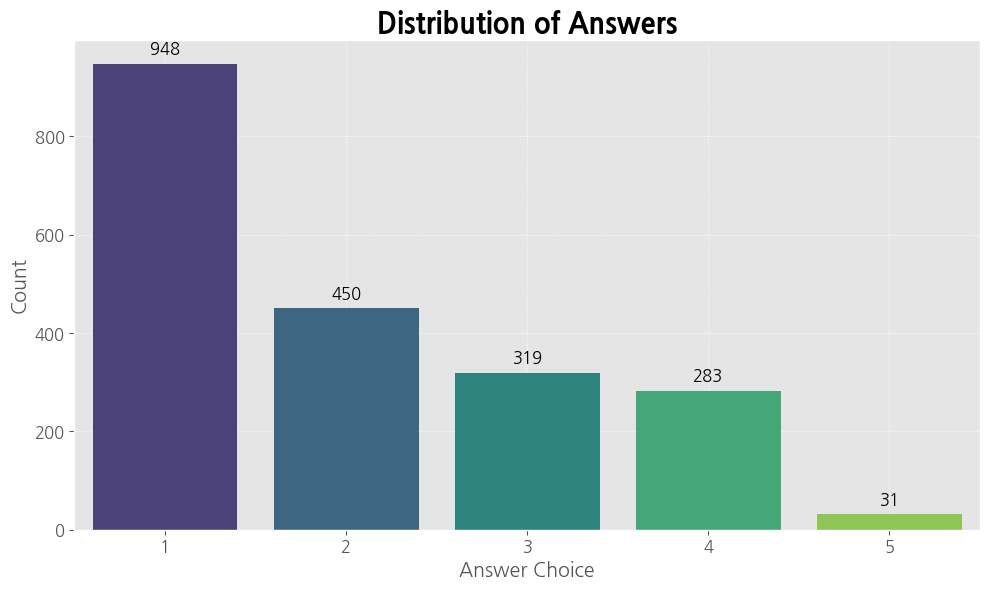

/tmp/ipykernel_3515290/1756428719.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


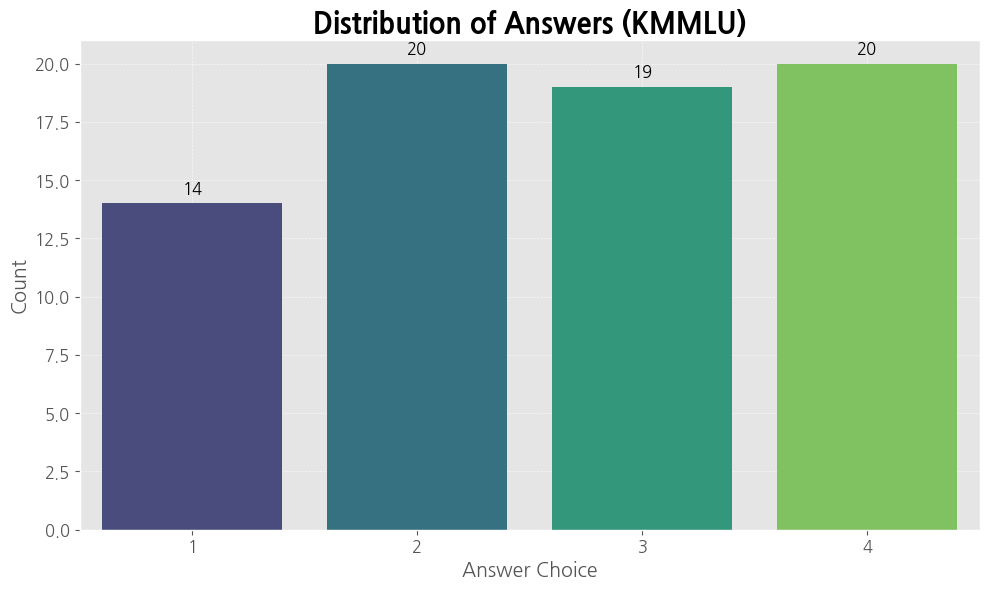

/tmp/ipykernel_3515290/1756428719.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


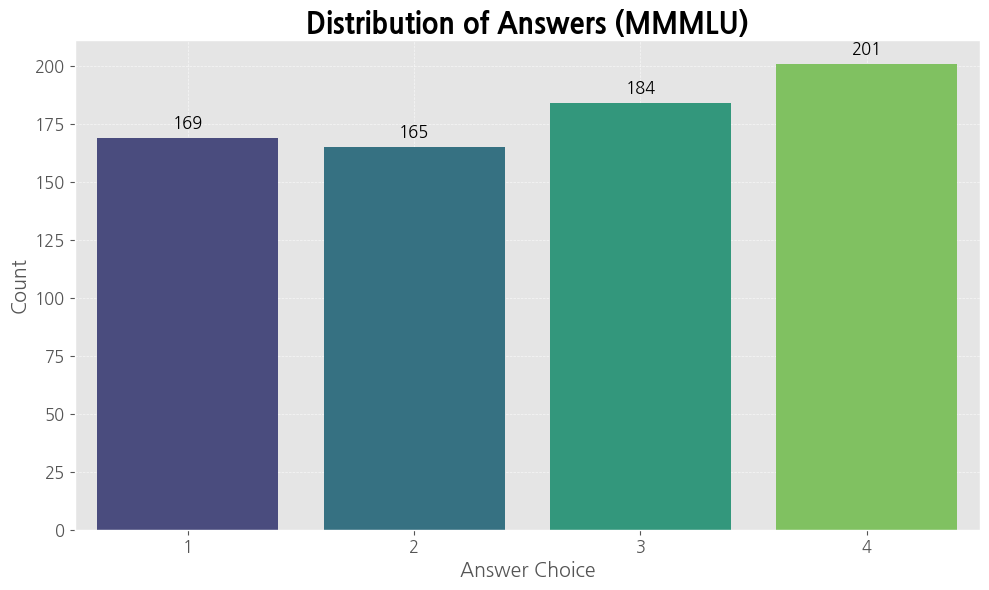

/tmp/ipykernel_3515290/1756428719.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


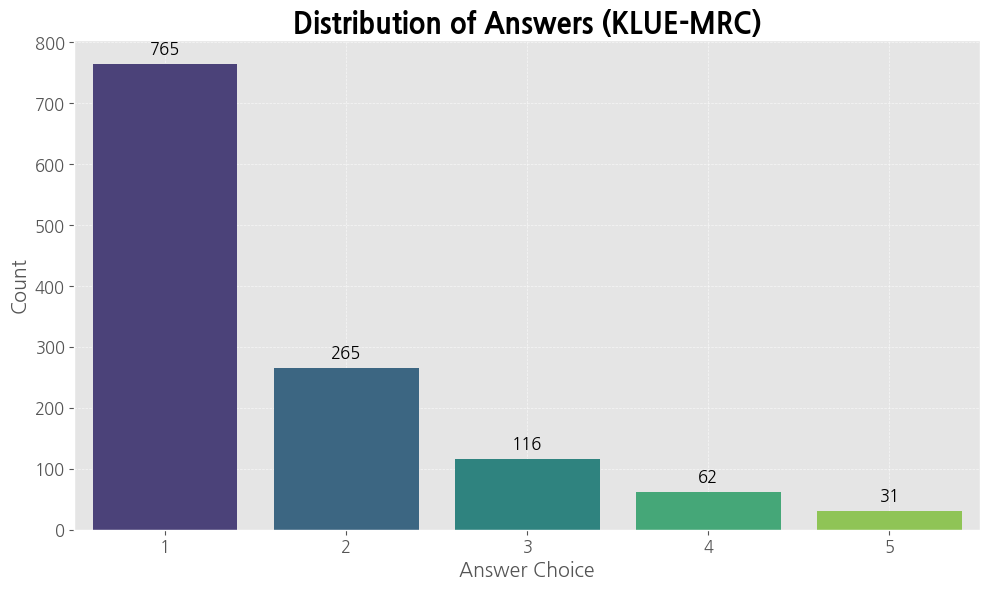

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# 공통 함수 정의: 막대 위 값 표시
def add_values_to_bars(ax, values):
    ymax = ax.get_ylim()[1]  # y축 최대값 가져오기
    for index, value in enumerate(values):
        ax.text(index, value + ymax * 0.02, str(value), ha='center', fontsize=12)  # y축의 2% 위에 값 표시

# 전체 데이터 정답 분포
answer_counts = train['answer'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=answer_counts.index,
    y=answer_counts.values,
    palette="viridis"
)
plt.title('Distribution of Answers', fontsize=20, fontweight='bold')
plt.xlabel('Answer Choice', fontsize=14)
plt.ylabel('Count', fontsize=14)
add_values_to_bars(ax, answer_counts.values)  # 값 추가
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# KMMLU 정답 분포
kmmlu_answer_counts = kmmlu['answer'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=kmmlu_answer_counts.index,
    y=kmmlu_answer_counts.values,
    palette="viridis"
)
plt.title('Distribution of Answers (KMMLU)', fontsize=20, fontweight='bold')
plt.xlabel('Answer Choice', fontsize=14)
plt.ylabel('Count', fontsize=14)
add_values_to_bars(ax, kmmlu_answer_counts.values)  # 값 추가
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# MMMLU 정답 분포
mmmlu_answer_counts = mmmlu['answer'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=mmmlu_answer_counts.index,
    y=mmmlu_answer_counts.values,
    palette="viridis"
)
plt.title('Distribution of Answers (MMMLU)', fontsize=20, fontweight='bold')
plt.xlabel('Answer Choice', fontsize=14)
plt.ylabel('Count', fontsize=14)
add_values_to_bars(ax, mmmlu_answer_counts.values)  # 값 추가
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# KLUE-MRC 정답 분포
klue_mrc_answer_counts = klue_mrc['answer'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=klue_mrc_answer_counts.index,
    y=klue_mrc_answer_counts.values,
    palette="viridis"
)
plt.title('Distribution of Answers (KLUE-MRC)', fontsize=20, fontweight='bold')
plt.xlabel('Answer Choice', fontsize=14)
plt.ylabel('Count', fontsize=14)
add_values_to_bars(ax, klue_mrc_answer_counts.values)  # 값 추가
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


Klue MRC는 gpt로 question과 choices를 생성했다고 해서 분포가 불균형하게 나오는듯

/tmp/ipykernel_3515290/1619836897.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


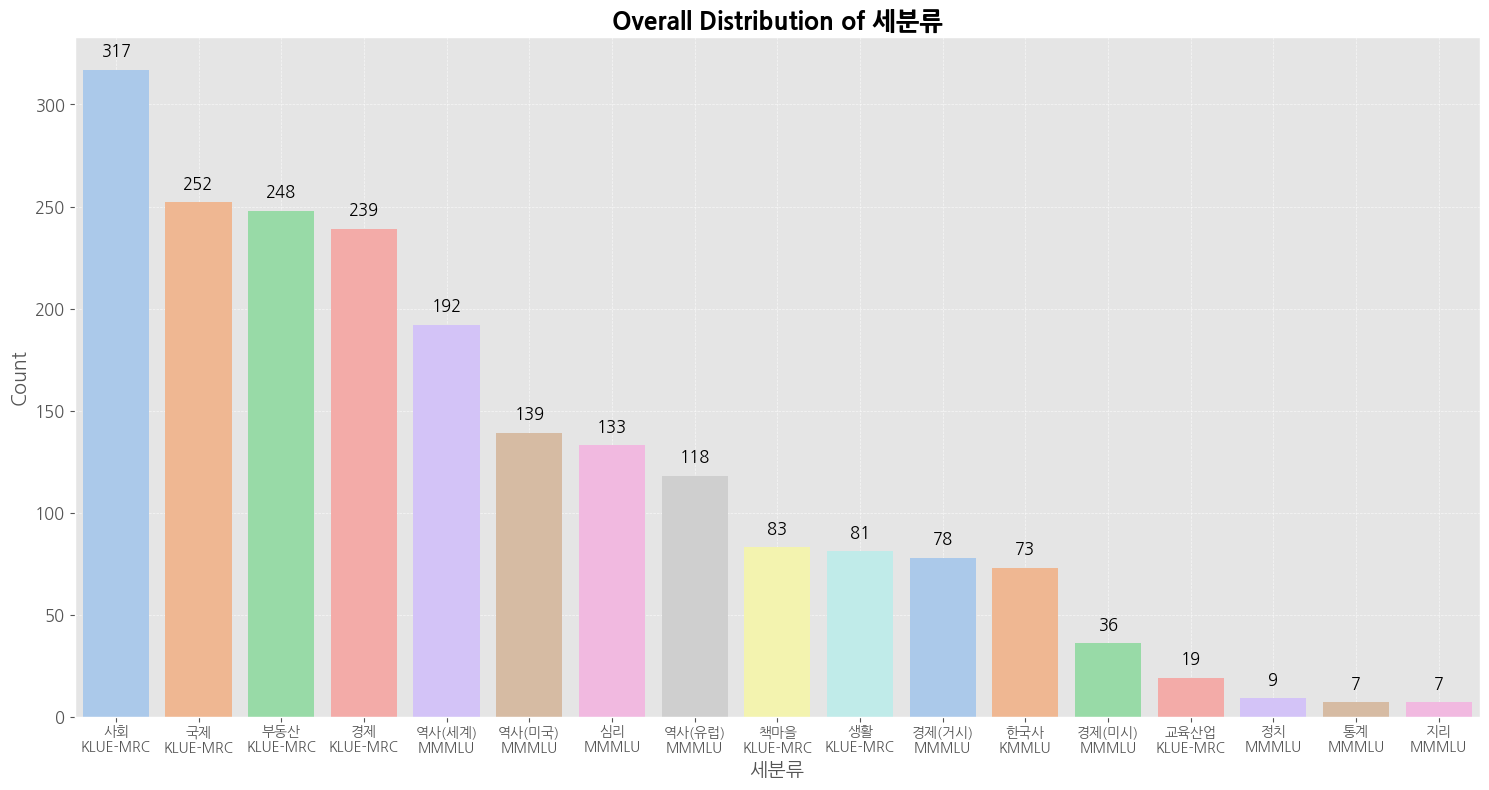

In [289]:
# '세분류(사람)' 값과 'dataset' 이름 결합
train['combined_label'] = train['세분류(사람)'] + '\n' + train['dataset']  # 순서를 바꾸고 \n 추가

# 결합된 라벨의 값 분포 계산
value_counts_combined = train['combined_label'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(15, 8))
sns.barplot(
    x=value_counts_combined.index,
    y=value_counts_combined.values,
    palette="pastel"
)

# 그래프 제목 및 축 라벨 설정
plt.title('Overall Distribution of 세분류', fontsize=18, fontweight='bold')
plt.xlabel('세분류', fontsize=14)  # x축 라벨 수정
plt.ylabel('Count', fontsize=14)

add_values_to_bars(plt.gca(), value_counts_combined.values)

# 눈금 및 레이아웃 조정
plt.xticks(rotation=0, fontsize=10)  # 세로 배치로 라벨 수정
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [83]:
train['필요 지식'].value_counts()

필요 지식
내부지식    1419
외부지식     612
Name: count, dtype: int64

In [84]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '/opt/conda/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 테스트용 코드
print(f"Loaded Font: {font_prop.get_name()}")

Loaded Font: NanumGothic


/tmp/ipykernel_3515290/582825777.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


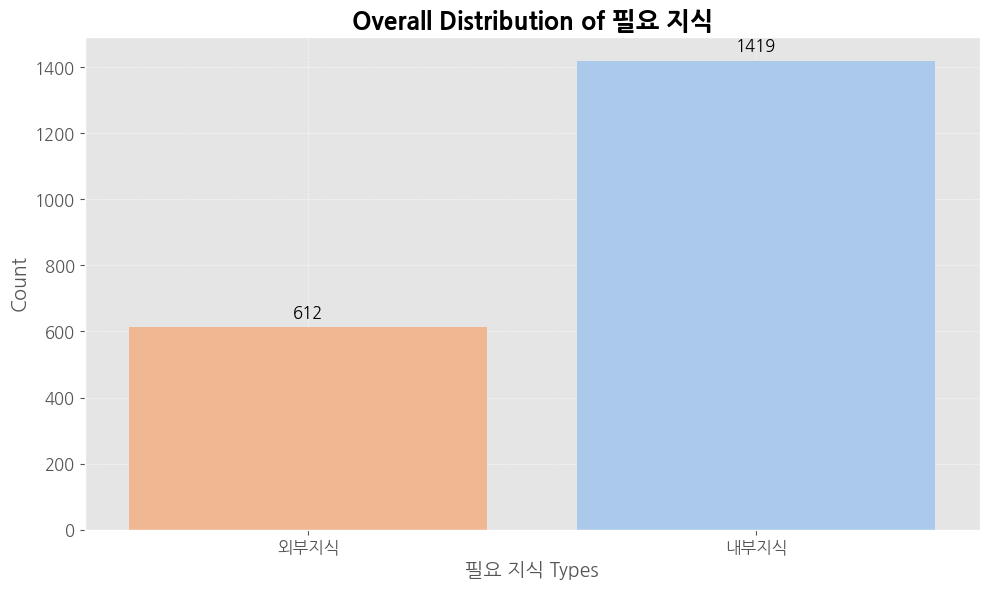

In [284]:
pastel_colors = sns.color_palette('pastel')
selected_colors = [pastel_colors[1], pastel_colors[0]]

# 필요 지식 분포 계산
knowledge_counts = train['필요 지식'].value_counts()

# 막대 순서를 바꿔서 전달
reordered_index = knowledge_counts.index[::-1]  # 현재 순서를 뒤집음

# 필요 지식 분포 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=reordered_index,  # 재배열된 순서 적용
    y=knowledge_counts.loc[reordered_index].values,
    palette=selected_colors
)

# 그래프 제목 및 축 라벨 설정
plt.title('Overall Distribution of 필요 지식', fontsize=18, fontweight='bold')
plt.xlabel('필요 지식 Types', fontsize=14)
plt.ylabel('Count', fontsize=14)

add_values_to_bars(plt.gca(), knowledge_counts.loc[reordered_index].values)

# 눈금 및 레이아웃 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [86]:
train_external_knowledge = train[train['필요 지식'] == '외부지식']
train_internal_knowledge = train[train['필요 지식'] == '내부지식']

print(train_external_knowledge.shape)
print(train_internal_knowledge.shape)
print(train.shape)

(612, 21)
(1419, 21)
(2031, 21)


/tmp/ipykernel_3515290/3051711630.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['combined_label'] = subset['세분류(사람)'] + '\n' + subset['dataset']  # 2줄로 표시
/tmp/ipykernel_3515290/3051711630.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3515290/3051711630.py:19: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/tmp/ipykernel_3515290/3051711630.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

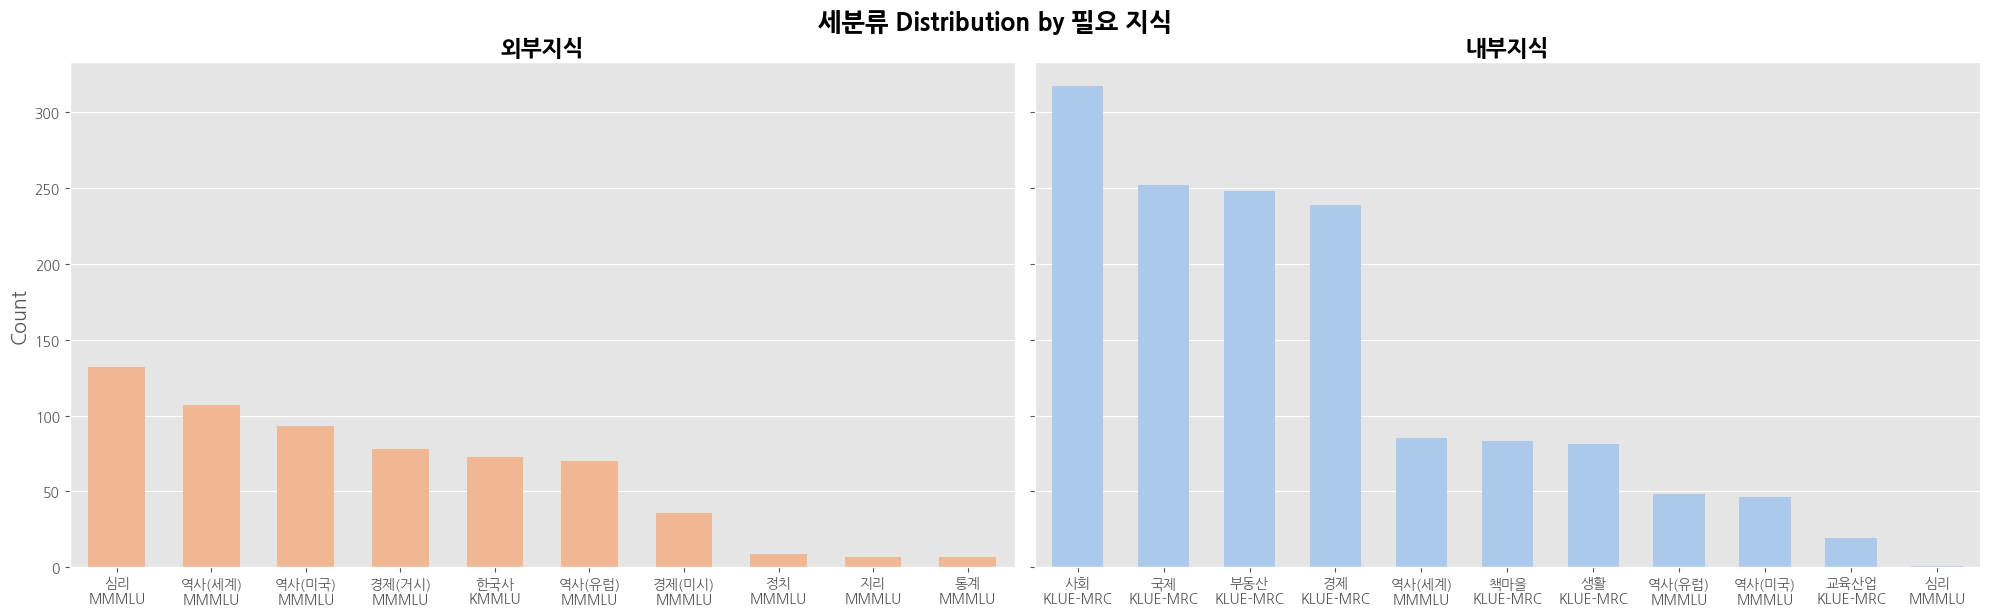

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# '필요 지식'별로 'dataset - 세분류(사람)' 값 분포 계산
knowledge_types = train['필요 지식'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(knowledge_types), figsize=(20, 6), sharey=True)  # figsize 확대

# 파스텔 색상에서 선택한 색
pastel_colors = sns.color_palette('pastel')
selected_colors = [pastel_colors[1], pastel_colors[0]]

for i, knowledge_type in enumerate(knowledge_types):
    # 필터링된 데이터 가져오기
    subset = train[train['필요 지식'] == knowledge_type]
    subset['combined_label'] = subset['세분류(사람)'] + '\n' + subset['dataset']  # 2줄로 표시
    value_counts = subset['combined_label'].value_counts()

    # 막대 그래프 시각화
    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        ax=axes[i],
        palette=[selected_colors[i]] if i < len(selected_colors) else selected_colors,
        width=0.6  # 막대 너비 축소
    )

    # 그래프 설정
    axes[i].set_title(f'{knowledge_type}', fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].set_xlabel('')  # x축 라벨 제거
    axes[i].tick_params(axis='x', labelsize=10, rotation=0)  # 라벨 회전 추가로 겹침 방지
    axes[i].set_xticks(range(0, len(value_counts.index), max(1, len(value_counts.index) // 10)))  # 간격 조정

# 전체 레이아웃 정리 및 표시
plt.tight_layout()
plt.suptitle('세분류 Distribution by 필요 지식', fontsize=18, fontweight='bold', y=1.02)
plt.show()


/tmp/ipykernel_3515290/647229126.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  knowledge_df_combined.groupby('Dataset - 세분류')
/tmp/ipykernel_3515290/647229126.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: pd.Series({


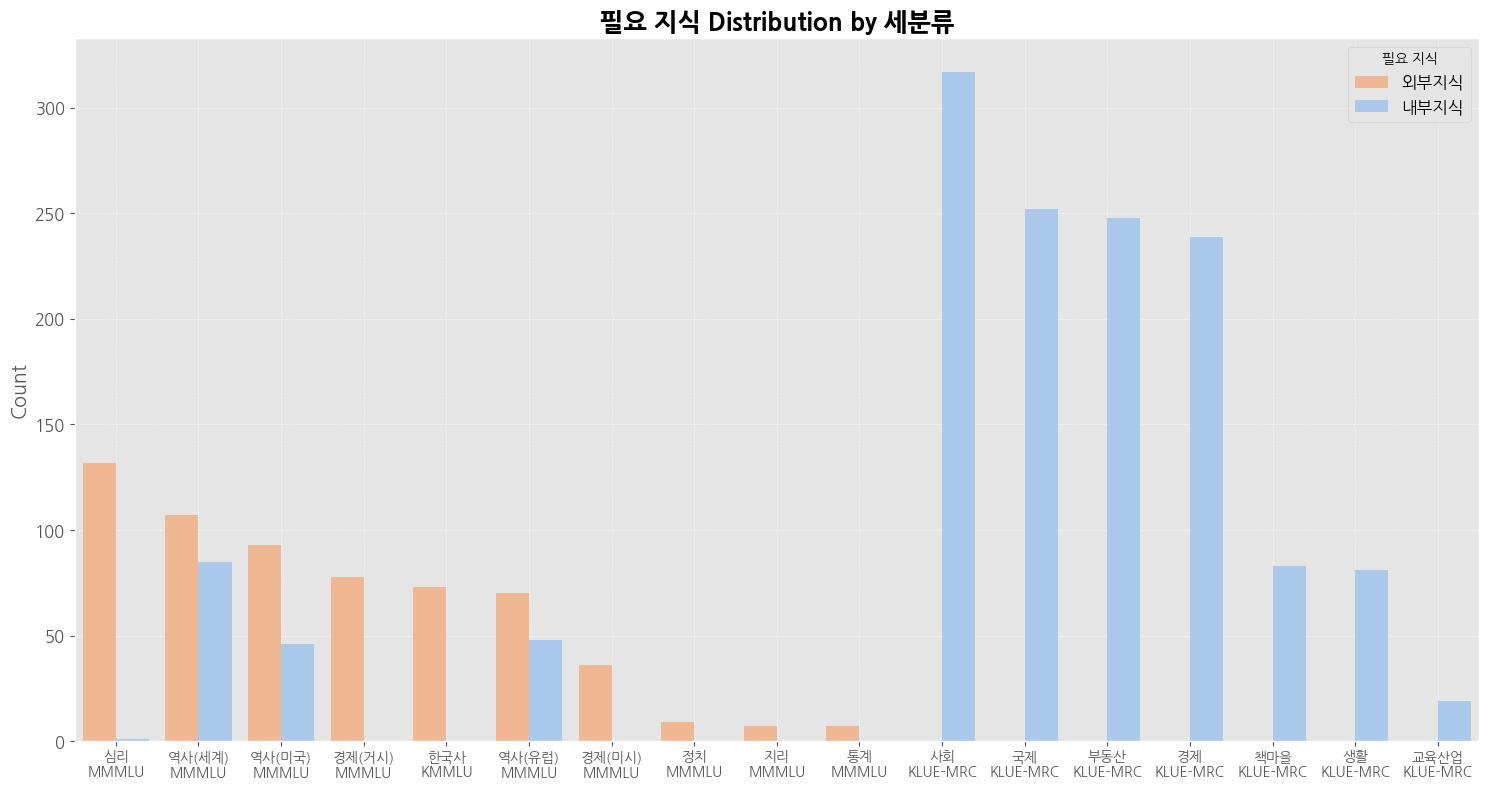

In [272]:
selected_colors = [pastel_colors[1], pastel_colors[0]]  # 색 순서를 바꿈

# 외부지식 및 내부지식 합계를 계산하여 데이터프레임 생성
sorted_data_df = (
    knowledge_df_combined.groupby('Dataset - 세분류')
    .apply(lambda df: pd.Series({
        '외부지식 합계': df.loc[df['필요 지식'] == '외부지식', 'Count'].sum(),
        '내부지식 합계': df.loc[df['필요 지식'] == '내부지식', 'Count'].sum()
    }))
    .sort_values(by=['외부지식 합계', '내부지식 합계'], ascending=[False, False])  # 정렬 기준 설정
)

# 정렬된 데이터의 인덱스 가져오기
sorted_data = sorted_data_df.index

# 데이터 정렬
knowledge_df_combined['Dataset - 세분류'] = pd.Categorical(
    knowledge_df_combined['Dataset - 세분류'], 
    categories=sorted_data, 
    ordered=True
)

# 막대 그래프 시각화
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=knowledge_df_combined,
    x='Dataset - 세분류',
    y='Count',
    hue='필요 지식',
    palette=selected_colors,
    order=sorted_data
)

# 그래프 제목 및 축 라벨 설정
plt.title('필요 지식 Distribution by 세분류', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count', fontsize=14)

# # 값 표시
# ymax = ax.get_ylim()[1]  # y축 최대값
# for p in ax.patches:
#     value = int(p.get_height())  # 정수로 변환
#     if value > 0:  # 값이 0 이상인 경우만 표시
#         ax.text(
#             x=p.get_x() + p.get_width() / 2,  # 막대 중심
#             y=p.get_height() + ymax * 0.02,  # ymax * 0.02만큼 위로
#             s=f'{value}',  # 정수 값
#             ha='center', va='bottom', fontsize=12, color='black'
#         )

# 눈금 및 레이아웃 조정
plt.xticks(
    ticks=ax.get_xticks(),
    labels=[
        '\n'.join(label.get_text().split(' - ')[::-1])
        for label in ax.get_xticklabels()
    ],
    fontsize=10
)
plt.yticks(fontsize=12)
plt.legend(title='필요 지식', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [89]:
low_qual_paragraph = train[train['데이터저품질-paragraph'] != "정상"]
low_qual_question = train[train['데이터저품질-question'] != "정상"]
low_qual_choices = train[train['데이터저품질-choices'] != "정상"]
low_qual_answer = train[train['데이터저품질-answer'] != "정상"]

/tmp/ipykernel_3515290/643284339.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


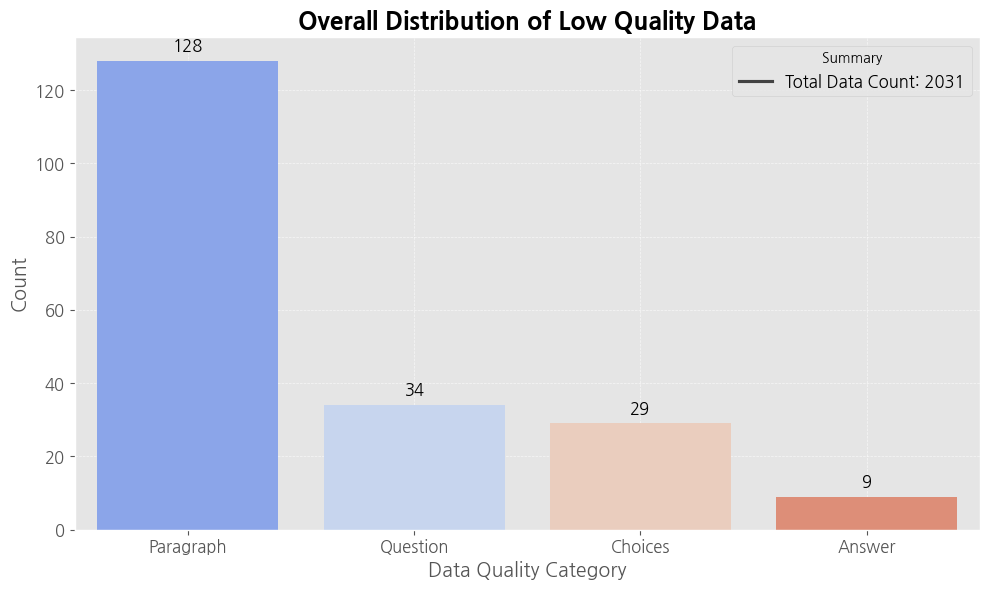

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 개수 계산
low_quality_counts = {
    'Paragraph': len(train[train['데이터저품질-paragraph'] != "정상"]),
    'Question': len(train[train['데이터저품질-question'] != "정상"]),
    'Choices': len(train[train['데이터저품질-choices'] != "정상"]),
    'Answer': len(train[train['데이터저품질-answer'] != "정상"]),
}

# 전체 데이터 개수 계산
total_data_count = len(train)

# 데이터프레임 생성
low_quality_df = pd.DataFrame(
    list(low_quality_counts.items()), 
    columns=['Category', 'Count']
)

# 세로 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    data=low_quality_df,
    x='Category',
    y='Count',
    palette="coolwarm"
)

# 그래프 제목 및 축 라벨 설정
plt.title('Overall Distribution of Low Quality Data', fontsize=18, fontweight='bold')
plt.xlabel('Data Quality Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 막대 위에 값 표시
add_values_to_bars(plt.gca(), low_quality_df['Count'])

# 전체 데이터 개수 레전드 추가
plt.legend(
    title='Summary',
    labels=[f'Total Data Count: {total_data_count}'],
    fontsize=12,
    loc='upper right'
)

# 눈금 및 레이아웃 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [91]:
print(f'전체 저품질 데이터 개수: {low_qual_paragraph.shape[0] + low_qual_question.shape[0] + low_qual_choices.shape[0] + low_qual_answer.shape[0]}')

전체 저품질 데이터 개수: 200


/tmp/ipykernel_3515290/1880777606.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3515290/1880777606.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3515290/1880777606.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3515290/1880777606.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


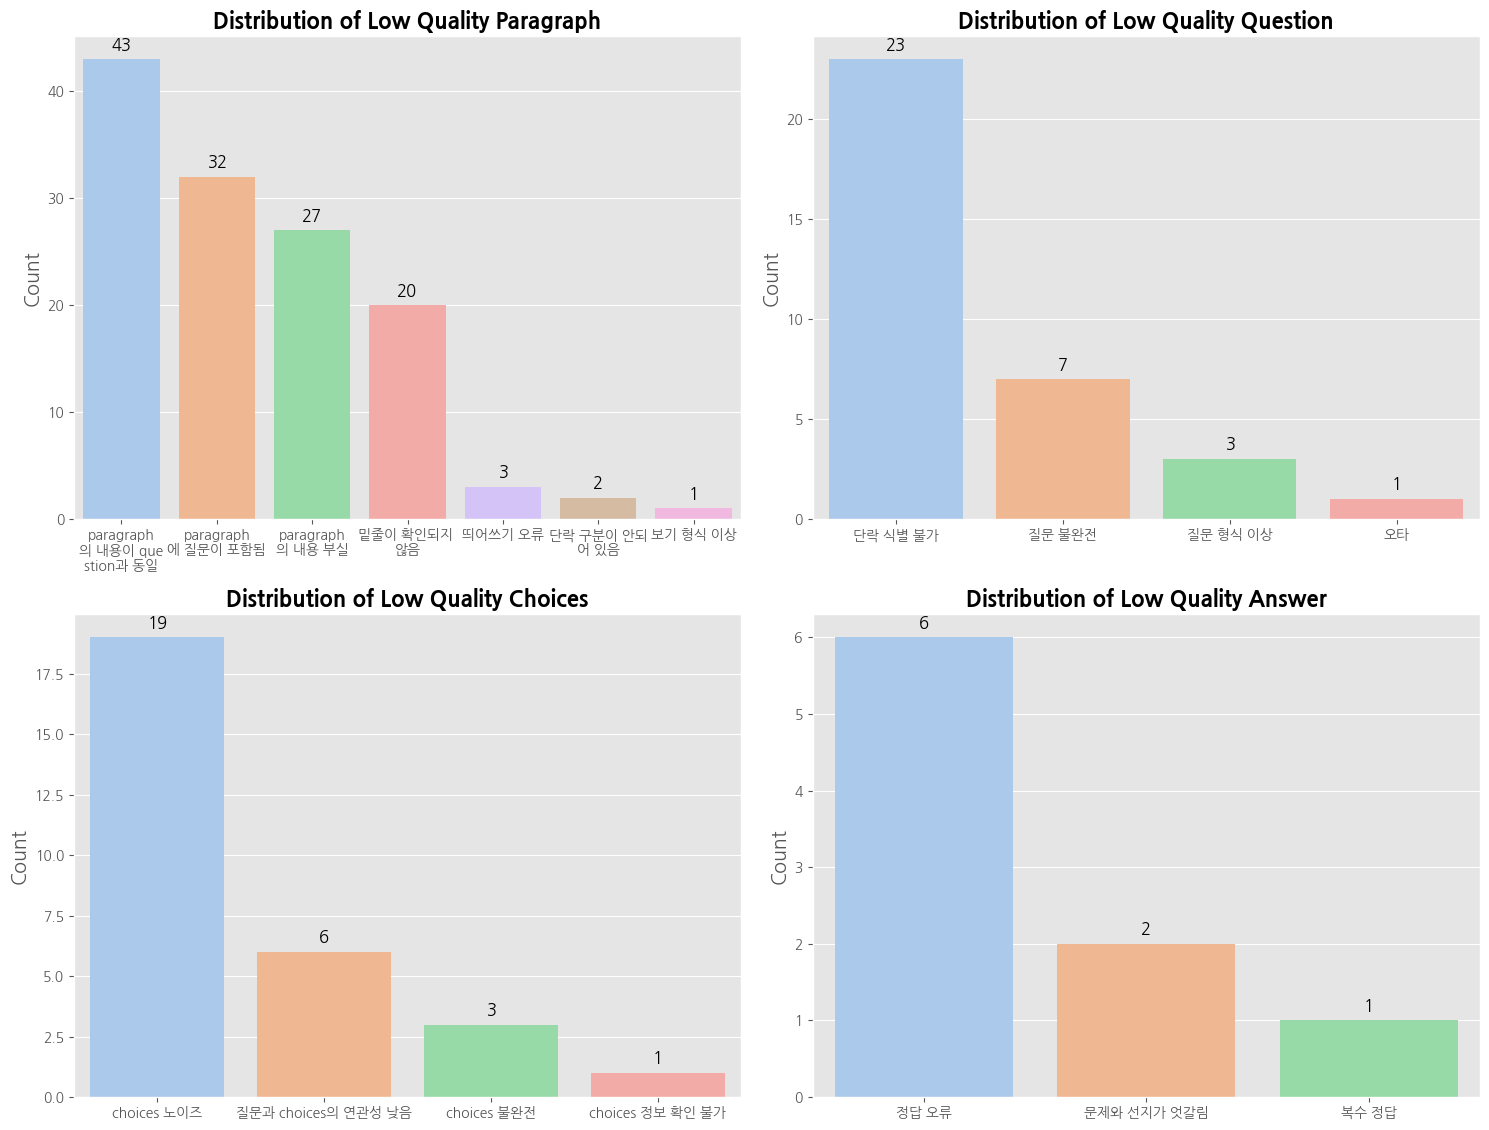

In [279]:
# 1. 데이터 저품질 카테고리별로 value_counts 계산
paragraph_quality_counts = low_qual_paragraph['데이터저품질-paragraph'].value_counts()
question_quality_counts = low_qual_question['데이터저품질-question'].value_counts()
choices_quality_counts = low_qual_choices['데이터저품질-choices'].value_counts()
answer_quality_counts = low_qual_answer['데이터저품질-answer'].value_counts()

# 전체 데이터 개수 계산
total_data_count = len(train)

# 2. 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 긴 라벨을 여러 줄로 나누는 함수 정의
def wrap_labels(labels, width=10):
    return ['\n'.join(label[i:i + width] for i in range(0, len(label), width)) for label in labels]

# Paragraph 저품질 시각화 (수정된 부분)
wrapped_paragraph_labels = wrap_labels(paragraph_quality_counts.index, width=9)
sns.barplot(
    x=wrapped_paragraph_labels, 
    y=paragraph_quality_counts.values, 
    ax=axes[0, 0], 
    palette="pastel"
)
add_values_to_bars(axes[0, 0], paragraph_quality_counts.values)

axes[0, 0].set_title('Distribution of Low Quality Paragraph', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel("")  # x축 설명 제거
axes[0, 0].set_ylabel('Count', fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=0)

# 나머지 부분은 그대로 유지
sns.barplot(
    x=question_quality_counts.index, 
    y=question_quality_counts.values, 
    ax=axes[0, 1], 
    palette="pastel"
)
add_values_to_bars(axes[0, 1], question_quality_counts.values)
axes[0, 1].set_title('Distribution of Low Quality Question', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel("")  # x축 설명 제거
axes[0, 1].set_ylabel('Count', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=0)

sns.barplot(
    x=choices_quality_counts.index, 
    y=choices_quality_counts.values, 
    ax=axes[1, 0], 
    palette="pastel"
)
add_values_to_bars(axes[1, 0], choices_quality_counts.values)
axes[1, 0].set_title('Distribution of Low Quality Choices', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel("")  # x축 설명 제거
axes[1, 0].set_ylabel('Count', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=0)

sns.barplot(
    x=answer_quality_counts.index, 
    y=answer_quality_counts.values, 
    ax=axes[1, 1], 
    palette="pastel"
)
add_values_to_bars(axes[1, 1], answer_quality_counts.values)
axes[1, 1].set_title('Distribution of Low Quality Answer', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel("")  # x축 설명 제거
axes[1, 1].set_ylabel('Count', fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=0)

# 전체 레이아웃 조정 및 표시
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend
plt.show()


In [93]:
x = 2
print(low_qual_paragraph.at[low_qual_paragraph.index[x], 'paragraph'])
print(low_qual_paragraph.at[low_qual_paragraph.index[x], 'question'])
print(low_qual_paragraph.at[low_qual_paragraph.index[x], 'choices'])
print(low_qual_paragraph.at[low_qual_paragraph.index[x], 'answer'])
print(low_qual_paragraph.at[low_qual_paragraph.index[x], '데이터저품질-paragraph'])
print()
print()
print(low_qual_question.at[low_qual_question.index[x], 'paragraph'])
print(low_qual_question.at[low_qual_question.index[x], 'question'])
print(low_qual_question.at[low_qual_question.index[x], 'choices'])
print(low_qual_question.at[low_qual_question.index[x], 'answer'])
print(low_qual_question.at[low_qual_question.index[x], '데이터저품질-question'])
print()
print()
print(low_qual_choices.at[low_qual_choices.index[x], 'paragraph'])
print(low_qual_choices.at[low_qual_choices.index[x], 'question'])
print(low_qual_choices.at[low_qual_choices.index[x], 'choices'])
print(low_qual_choices.at[low_qual_choices.index[x], 'answer'])
print(low_qual_choices.at[low_qual_choices.index[x], '데이터저품질-choices'])
print()
print()
print(low_qual_answer.at[low_qual_answer.index[x], 'paragraph'])
print(low_qual_answer.at[low_qual_answer.index[x], 'question'])
print(low_qual_answer.at[low_qual_answer.index[x], 'choices'])
print(low_qual_answer.at[low_qual_answer.index[x], 'answer'])
print(low_qual_answer.at[low_qual_answer.index[x], '데이터저품질-answer'])

올해 초가을에 비로소 저는 책을 완성하여 그 이름을 성학집요 라고 하였습니다. 이 책에는 임금이 공부해야 할 내용과 방법, 정치하는 방법, 덕을 쌓아 실천하는 방법과 백성을 새롭게 하는 방법이 실려 있습니다. 또한 작은 것을 미루어 큰 것을 알게 하고 이것을 미루어 저것을 밝혔으니, 천하의 이치가 여기에서 벗어나 지 않을 것입니다. 따라서 이것은 저의 글이 아니라 성현의 글이 옵니다.
밑줄 친 ‘저’에 대한 설명으로 옳은 것은?
['예안향약을 만들었다 .', '동호문답 을 저술하였다 .', '백운동 서원을 건립하였다 .', '왕자의 난 때 죽임을 당했다 .']
2
밑줄이 확인되지 않음


“비잔틴의 학문과의 교류를 통해 학자 아리스토텔레스를 플라톤으로 대체하는 것이 빨라졌습니다. 이미 페레라 공의회(1438년)에서 명목상으로 동서 교회를 통합하였으며, 비잔틴 제국이 아리스토텔레스에 비해 플라톤의 우월성을 유지한 지에 대한 논쟁이 있었습니다. 코시모와 로렌초 데 메디치는 둘다 플라톤에 깊이 빠져있었으며; 코시모가 피렌체 아카데미를 설립하고 로렌초가 이를 계속 유지했으며, 이 아카데미는 주로 플라톤에 대한 연구에 전념했습니다&…그러나 당시의 인문주의자들은 고대의 지식을 습득하는 데 너무 급급하여 가치있는 무언가를 창출할 수 없었습니다.”
이 구절을 통해 페레라 공의회가 한 일을 유추할 수 있습니다
['피렌체 아카데미의 기초를 닦았습니다', '동서 교회간의 불화를 영구적으로 화해시켰습니다', '서유럽에서 고전철학의 재발견을 촉진시켰습니다', '비잔틴 제국이 피렌체의 학문을 배우는 것을 허용하였습니다']
3
질문 형식 이상


아름다운 것을 만들고자 하는 욕망과는 별개로, 내 인생을 이끈 열정은 헌대문명에 대한 증오였습니다. 내가 그러한 말을 했다고 했을 때, 그것이 파괴를 바라는 나의 희망을 이제 뭐라고 말해야 할까요-사회주의가 그것을 대체하는 것에 대해 나는 뭐라고 말해야 할까요? 숙달과 기계력의 낭비, 너무 가난한 영연방, 너무 부유한 영연방의 적들, 삶의 불행

In [94]:
bogi = train[train['보기 여부'] == True]
for x in range(10):
    print(bogi.at[bogi.index[x], 'paragraph'])

상소하여 아뢰기를 , “신이 좌참 찬 송준길이 올린 차자를 보았는데 , 상복(喪服) 절차에 대하여 논한 것이 신과는 큰 차이가 있었습니다 . 장자를 위하여 3년을 입는 까닭은 위로 ‘정체(正體)’가 되기 때문이고 또 전 중(傳重: 조상의 제사나 가문의 법통을 전함)하기 때문입니다 . …(중략) … 무엇보다 중요한 것은 할아버지와 아버지의 뒤를 이은 ‘정체’이지, 꼭 첫째이기 때문에 참 최 3년 복을 입는 것은 아닙니다 .”라고 하였다 .－현종실록 －ㄱ.기 사환국으로 정권을 장악하였다 .ㄴ.인 조반정을 주도 하여 집권세력이 되었다 .ㄷ.정조 시기에 탕평 정치의 한 축을 이루었다 .ㄹ.이 이와 성혼의 문인을 중심으로 형성되었다.
(가)신라의 한강 유역 확보 (나)관산성 전투(다) 백제의 웅진 천도 (라)고구려의 평양 천도
(가)신라의 우산국 복속 (나)고구려의 서 안평 점령(다) 백제의 대야성 점령 (라)신라의 금관가야 병합
(가)농민군이 정부와 전주화약을 맺었다. (나) 농민군이 우금치에서 전투를 벌였다. (다) 농민군이 황토현에서 관군을 물리쳤다. (라) 전봉준 등이 농민을 모아 고부 관아를 습격하였다.
(가) 김시민이 진주성에서 일본군을 저지하였다.(나) 조선수군이 명량해전에서 크게 승리하였다.(다)이순신이 옥포해전에서 승리하였다.(라) 조명연합 수군이 노량해전에서 승리하였다.(마)조명연합군이 평양성을 탈환하였다.
왕41년 겨울 10월에 백제근 초고왕이 군사 3만명을 이끌고 평양성을 공격해왔다.왕이 군대를 내어 막다가 화살에 맞아 돌아가셨다. －삼국사기－(가)(나)(다)(라) 낙랑 ․대방군축출 모용황에 의해 환도성 함락 전진의 순도 불교 전래평양 천도백 제한성 함락
(가) 이종무가 대마도를 토벌하였다.(나) 김윤후가 용인에서 살리타를 사살하였다.(다) 김헌창이 공주를 근거로 반란을 일으켰다.(라) 이 시애가 길주에서 군사를 일으켰다.
(가)신라의 우산국 복속 (나)고구려의 서 안평 점령(다) 백제의 대야성 점령 (라)신라의 금관가야 병합
(가)중앙군인 5위를

In [95]:
bigo = train[train['비고'] != ""]
bigo['비고'].value_counts()

비고
정답 4       3
정답 2       2
정답 3       1
정답 1, 5    1
Name: count, dtype: int64

주요 용어 파악하기